In [1]:
import polars as pl

from adex.models import Condition, TissueEnum, \
    ConditionSequencingTissueDataLoader, SequencingTechnique
from adex.pca import PcaHelper

import logging
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = 20

files_path = "../data/adex-database/samples"
metadata_path = "../data/adex-database/metadata.csv"
datasets_info_path = "../data/adex-database/datasets_info.csv"

results_path = "../results" 

# PCA after DE for RA/RNA_SEQ/SYNOVIAL_MEMBRANE 

In [2]:
de_genes = (
    pl
        .read_csv(f"{results_path}/RA_RNA_SEQ_SYNOVIAL_MEMBRANE/edgeR_de_genes.csv", has_header=True)
        .to_series()
        .to_list()
)
len(de_genes)

148

In [3]:
de_genes

['HOXC-AS1',
 'U62317.1',
 'AC020909.4',
 'AL139099.1',
 'AC017083.2',
 'HSPE1-MOB4',
 'AC211429.1',
 'AC124068.1',
 'AC025423.4',
 'HIST1H2BO',
 'AC006027.1',
 'AC132217.1',
 'AC243772.2',
 'CCER2',
 'FOXI2',
 'AC068631.2',
 'LINC02577',
 'AC090617.3',
 'RPL39P3',
 'GOLGA5P1',
 'HIST1H2BB',
 'AC112496.1',
 'CDC25C',
 'AC009955.4',
 'TNFRSF10A-AS1',
 'MOXD1',
 'SNRPGP10',
 'LINC02384',
 'AC099560.2',
 'AC025259.1',
 'SPATA20P1',
 'AC008993.2',
 'AC103591.3',
 'AC096667.1',
 'AL359095.1',
 'HILS1',
 'XCL1',
 'SERPINI2',
 'GPR171',
 'DM1-AS',
 'RNVU1-14',
 'AL136295.1',
 'HIST1H2AK',
 'RNVU1-15',
 'AC026369.3',
 'HAUS1P1',
 'KIF14',
 'AC084876.1',
 'AC005224.3',
 'MELK',
 'DEPDC1B',
 'TRGV10',
 'MTND1P23',
 'NTN3',
 'AP003696.1',
 'AC090971.1',
 'AC098869.2',
 'LINC02605',
 'AC006272.1',
 'TCTEX1D1',
 'AL035078.4',
 'STEAP1B',
 'TAS2R64P',
 'AC005224.2',
 'TAS2R43',
 'AC013444.1',
 'RPL26P19',
 'AC012181.2',
 'B3GALNT1P1',
 'AC068831.4',
 'FTH1P7',
 'AP000462.1',
 'AL138955.1',
 'AL35988

INFO : --- Running PCA for 'RA|RNA_SEQ|SYNOVIAL_MEMBRANE'---
INFO : Loaded dataset for PCA with shape: Samples(180), Genes+Metadata(160)
INFO : Dataset normalised | Mean: '5.607793175433974e-17' Standard Deviation:'1.0'
INFO : Explained variation per principal component: [0.51357318 0.05840748]
INFO : ----------------------------------------------


<Figure size 640x480 with 0 Axes>

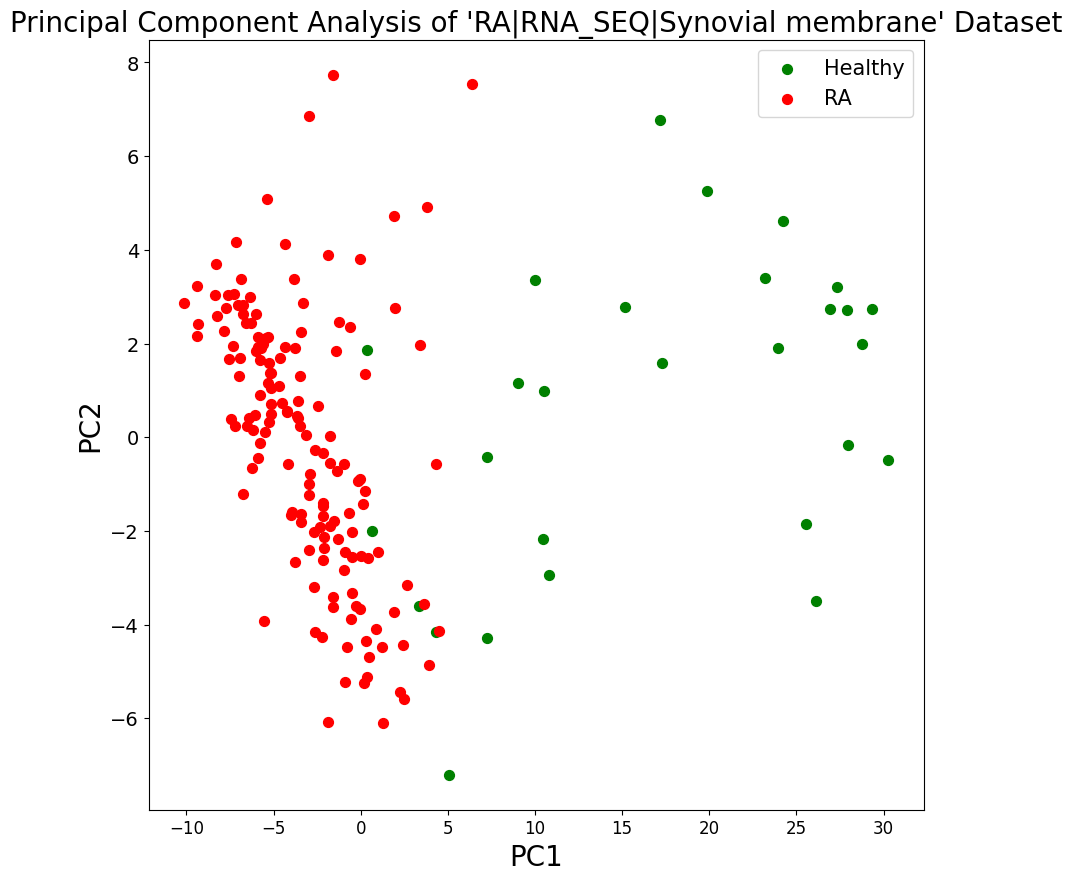

In [4]:
pca = PcaHelper(
    ConditionSequencingTissueDataLoader(
        condition=Condition.RA,
        sequencing_technique=SequencingTechnique.RNA_SEQ,
        tissue=TissueEnum.SYNOVIAL_MEMBRANE,
        genes=de_genes
    ),
    files_path,
    metadata_path,
    datasets_info_path
)
pca.draw(
    column_that_defines_colors="Condition",
    target_colors=[
        ("Healthy", "g"),
        (Condition.RA.name, "r")
    ]
)

# PCA after DE for SLE/RNA_SEQ/WHOLE_BLOOD


In [5]:
de_genes = (
    pl
    .read_csv(f"{results_path}/SLE_RNA_SEQ_WHOLE_BLOOD/edgeR_de_genes.csv", has_header=True)
    .to_series()
    .to_list()
)
len(de_genes)

7

In [6]:
de_genes

['OTOF', 'AP001610.1', 'IFI27', 'AL445490.1', 'FBXO39', 'USP41', 'BCL2L14']

INFO : --- Running PCA for 'SLE|RNA_SEQ|WHOLE_BLOOD'---
INFO : Loaded dataset for PCA with shape: Samples(117), Genes+Metadata(17)
INFO : Dataset normalised | Mean: '-4.825877860397506e-17' Standard Deviation:'0.9999999999999998'
INFO : Explained variation per principal component: [0.87219505 0.04712718]
INFO : ----------------------------------------------


<Figure size 640x480 with 0 Axes>

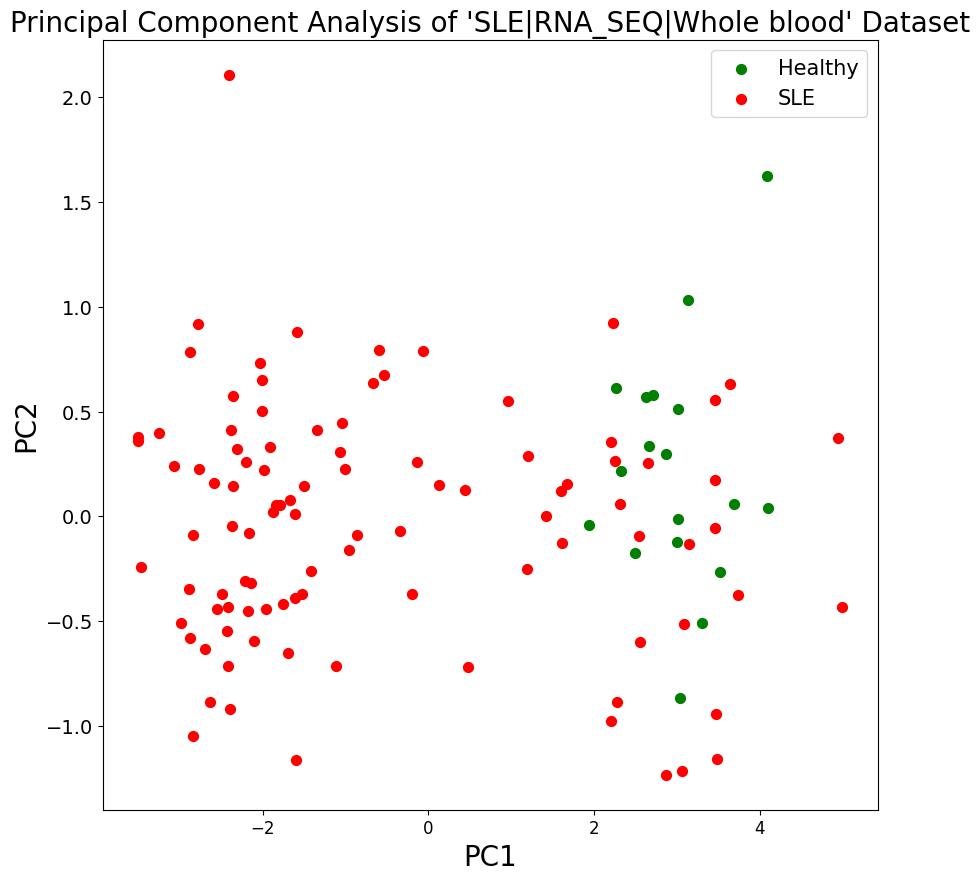

In [7]:
pca = PcaHelper(
    ConditionSequencingTissueDataLoader(
        condition=Condition.SLE,
        sequencing_technique=SequencingTechnique.RNA_SEQ,
        tissue=TissueEnum.WHOLE_BLOOD,
        genes=de_genes
    ),
    files_path,
    metadata_path,
    datasets_info_path
)
pca.draw(
    column_that_defines_colors="Condition",
    target_colors=[
        ("Healthy", "g"),
        (Condition.SLE.name, "r")
    ]
)